<a href="https://colab.research.google.com/github/Rume15/Classical-Machine-Learning-Algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The following topics are covered**



*   Downloading a real-world dataset from Kaggle
*   Exploratory data analysis and visualization.
*   Splitting a dataset in to training, validation and tests sets.
*   Filling/imputing missing values in numeric columns.
* Scaling numeric features to a (0,1) range.
*  Encoding categorical columns as one-hot vectors.
*  Traininng a logistic regression using `scickit_learn`.
*  Evaluating a model using a validation set and test set.
*  Saving a model to disk and uploading it back.



##**Problem Statement**

Learn how to apply logistic regression to a real-world dataset from Kaggle.

**QUESTION:** The Rain Autralia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:

As a **data scientist at the Bureau of Meteorology**, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

In [ ]:
#import pandas as pd
#WeatherData=pd.read_csv("WeatherData.csv")
#WeatherData.head()

Logistic Regression is better suited for classification problems .i.e predicticting whether it would rain tomorrow.

**Classification Problems**
Problems where each input must be assigned a discrete category (also called label or class) are known as classification problems. They include:


1.   **Rainfall prediction**: Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will No Rain")
2.   **Breast cancer detection**: Predicting whether a tumor is "benign"(noncancerous) or "malignant"(cancerous) using information like its radius, texture.

3. **Loan Repayment Prediction**:Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children

4. **Handwritten Digit Recognition**:Identifying which digit from 0 to 9 a picture of handwritten text represents.


**Regression Problems**
Problems where a continuous value must be predicted for each input are known as regression problems.
They include:


1.   Medical charges Prediction
2.   House Price Prediction
1.   Ocean Tempeature Prediction
2.   Weather Temperature Prediction




*Linear regression is a commonly used technique for solving regression problems. In linear regression, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE)*

## **Logistic Regression for Solving Classification Problems**

Logistic Regression is a commonly used technique for solving binary classification problems. In a logistic regression model:


1.   We take linear combination (or weighted sum of the input features)
2.   We apply the sigmoid function to the result
3. This number represents the probability of the input being classified as "yes"
4. Instead of RMSE, the `cross entropy` loss function is used to evaluate the results.

*The sigmoid function applied to the linear combination of inputs has the following formula:*![ML.jpg](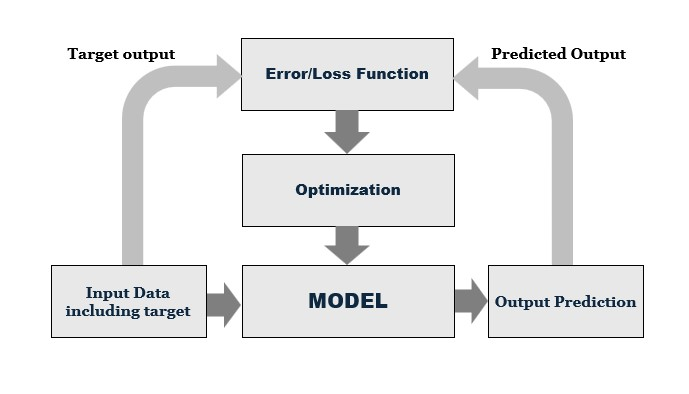![ML.jpg](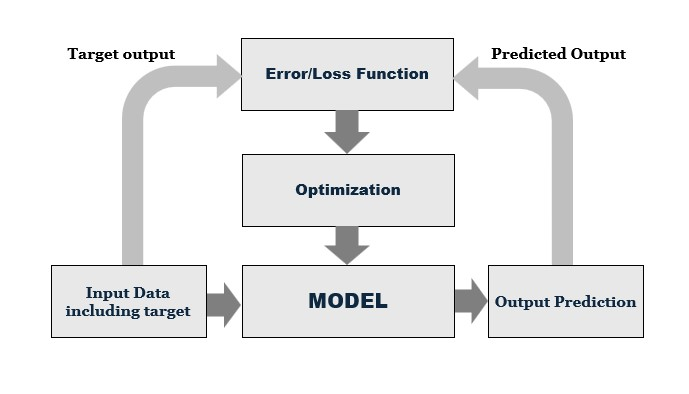![ML.jpg](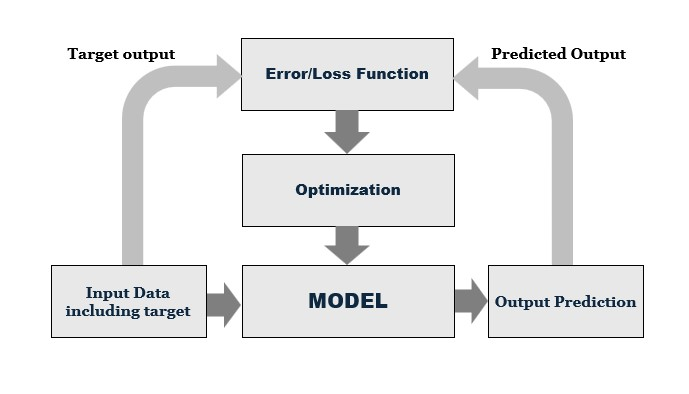![ML.jpg](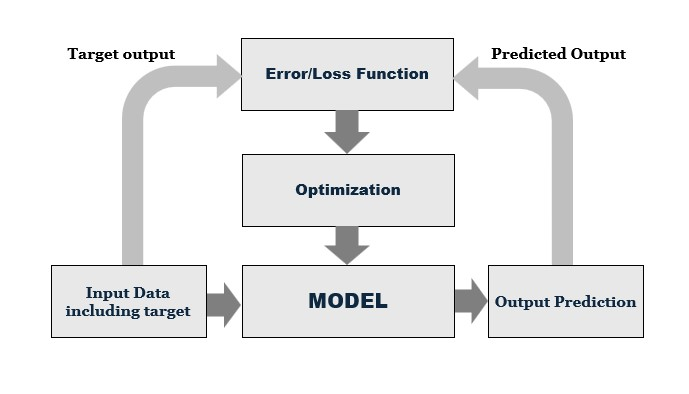![ML.jpg](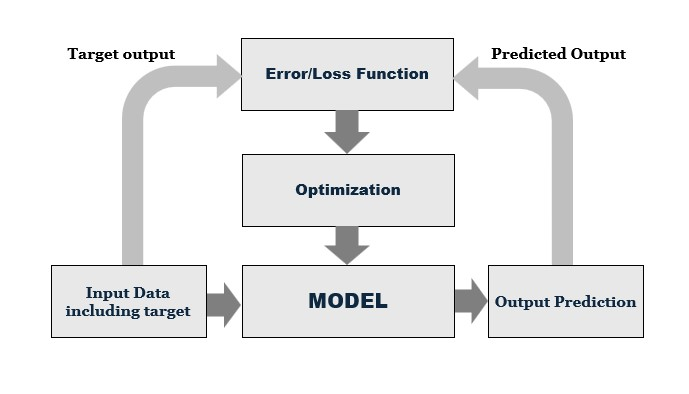![1694183259538.png](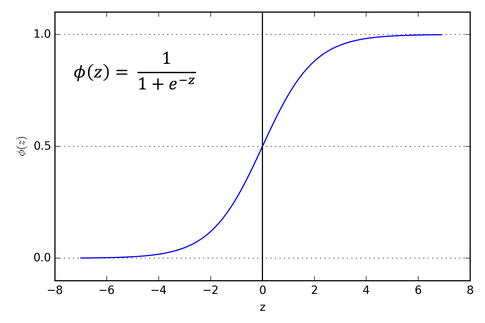![1694183259538.png](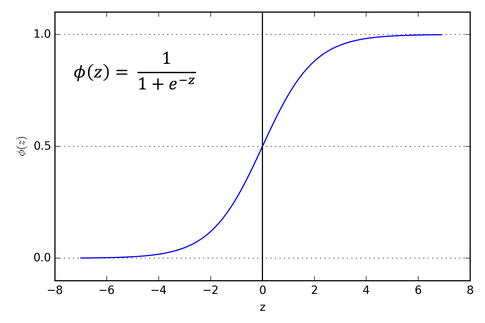![ML.jpg](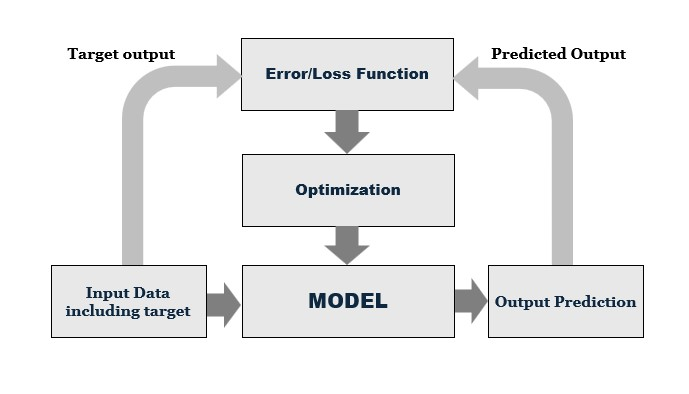![1694183259538.png](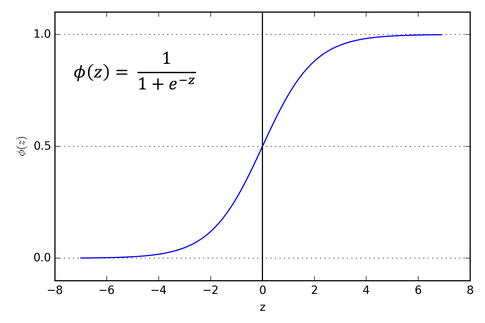![1694183259538.png](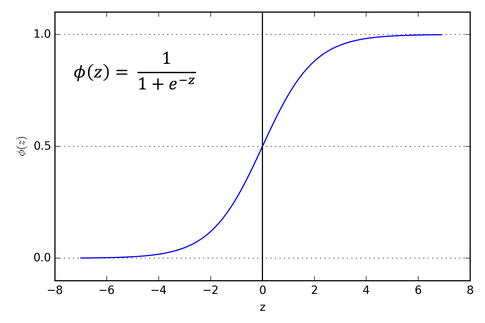![1694183259538.png](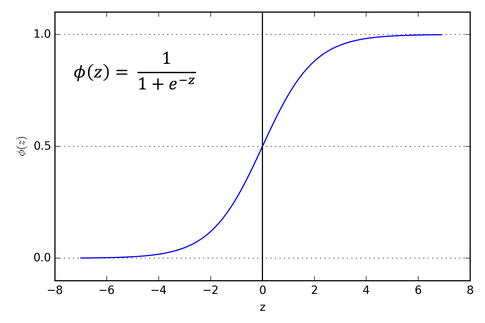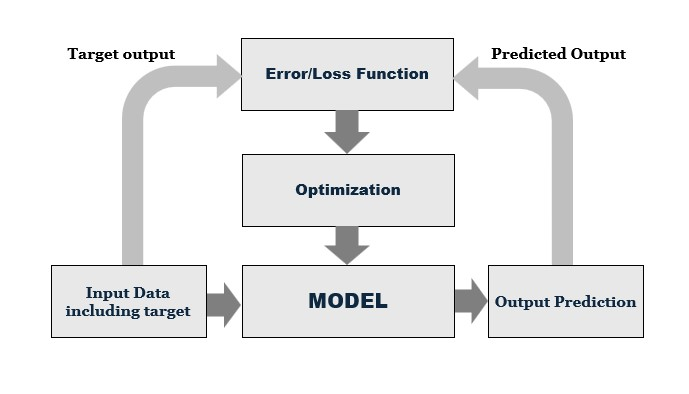)))))))))))
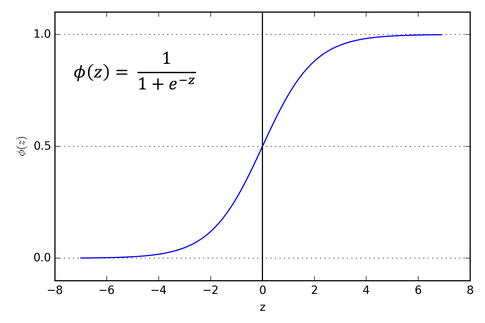

The output of the sigmoid function is called logistic, hence the name `logistic regression`. Logistic regression can also be applied to multi class. Classification and regression are both supervised machine learning problems, because they use labeled data.



**Machine Learning Workflow**

The workflow for training a model is the same for both regression and classification models.


1.   We initialize a model with random parameters (weights & biases)
2.   We pass some inpts into the model to obtain predictions.
3.  We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (ordinary least squares, gradient descent) to reduce the loss function by adjusting the weights and biases of the model.
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

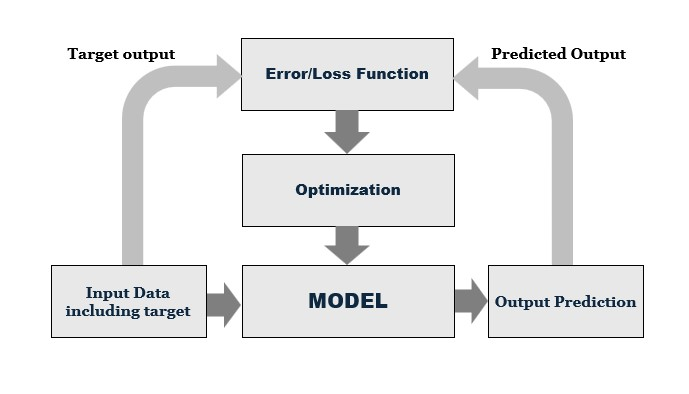


**Downloading the Data**

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

The dataset can be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key.

In [ ]:
dataset_url='https://www.kaggle.com/datasets/mariatherese/australia-weather'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rumerodgers
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mariatherese/australia-weather


100%|██████████| 3.85M/3.85M [00:00<00:00, 5.87MB/s]


Once the above command is executed, the dataset is downloaded and extracted to the directory  `australia_weather`

In [ ]:
import os

In [ ]:
data_dir='./australia-weather'

In [ ]:
os.listdir(data_dir)

['australia weather.csv']

In [ ]:
train_csv=data_dir+'/australia weather.csv'
train_csv

'./australia-weather/australia weather.csv'

In [ ]:
import pandas as pd

In [ ]:
raw_df=pd.read_csv(train_csv)
raw_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01/12/2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02/12/2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03/12/2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04/12/2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05/12/2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01/12/2008   Albury     13.4     22.9       0.6          NaN   
1       02/12/2008   Albury      7.4     25.1       0.0          NaN   
2       03/12/2008   Albury     12.9     25.7       0.0          NaN   
3       04/12/2008   Albury      9.2     28.0       0.0          NaN   
4       05/12/2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  21/06/2017    Uluru      2.8     23.4       0.0          NaN   
145456  22/06/2017    Uluru      3.6     25.3       0.0          NaN   
145457  23/06/2017    Uluru      5.4     26.9       0.0          NaN   
145458  24/06/2017    Uluru      7.8     27.0       0.0          NaN   
145459  25/06/2017    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

The dataset contains over 145, 000rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`
Let's check the data types and missing values in the various columns.


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

*While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of `RainTomorrow` or `RainToday` is missing to make our analysis simpler(Since one of them is a target variabe, and the other is likely to be very closely related to the target variable).*

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'],inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

##**Exploratory Data Analysis and Visualization**

We explore the distributions of various columns and see how they are related to the target column using `Plotly` , `Matplotlib` and `Seaborn` libraries.

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
raw_df.Location.nunique()

49

In [ ]:
px.histogram(raw_df,x='Location', title='Location vs. Rainy Days', color='RainToday')

There is uniform distribution of data across all locations.
Generally about 20 % of days had rain while the remaining 80 % had no rain.

In [ ]:
px.histogram(raw_df, x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

The histogram forms a gaussian distribution.

When the temperature is lower, the chances of rainfall might be higher tomorrow as compared to when the temperature is higher.

In [ ]:
px.histogram(raw_df, x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

1.  Out of 140,000 days ,some 10,000 data point sit reoined on the next day.
2. There is clearly a class imbalance .i.e the number of yes and no.
3.  It is easier to predict that it won't rain tomorrow given it didn't rain today.

In [ ]:
px.scatter(raw_df.sample(2000),
title='Min Temp. vs Max Temp.',
x='MinTemp',
y='MaxTemp',
color='RainToday')

If the

In [ ]:
px.strip(raw_df.sample(2000),
title='Temp (3 pm) vs. Humidity (3 pm)',
x='Temp3pm',
y='Humidity3pm',
color='RainTomorrow')

**(Optional) Working with a Sample**

>When working with massive datasets containing millions of rows, it's good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to wrk with a sample, just set the value of `use_sample` to True.



In [ ]:
use_sample = False

In [ ]:
sample_fraction = 0.1

In [ ]:
if use_sample:
  raw_df=raw_df.sample(frac=sample_fraction).copy()


Make sure to set `use_sample` to `False` and re-run the notebook and end-to-end once you're to use the netire dataset.

##**Training, Validation and Test Sets**

1. **Training set** - Used to train the model, i.e. compute the loss and adjust the model's weights using an optimization technique.
2. **Validation set** - Used to evaluate the model duriing training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well.
3. **Test set** - Used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test should reflect the kind of data the model will encounter in the real-world, as closely as feasible.

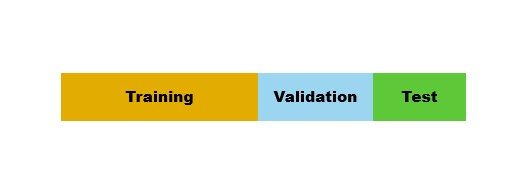

As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use 75% - 25% training-validation split.

When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This is done using the `train_test_split` utility from `scikit-learn`.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df= train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size= 0.25, random_state=42)

print('train_df.shape:', train_df.shape)
print('val_df.shape:',val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (84471, 23)
val_df.shape: (28158, 23)
test_df.shape: (28158, 23)


However, while working with dates, it's often a better idea to separate the training , validation and test sets with time, so that the models trained on data from the past and evaluated on data from the future.

For the curent dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

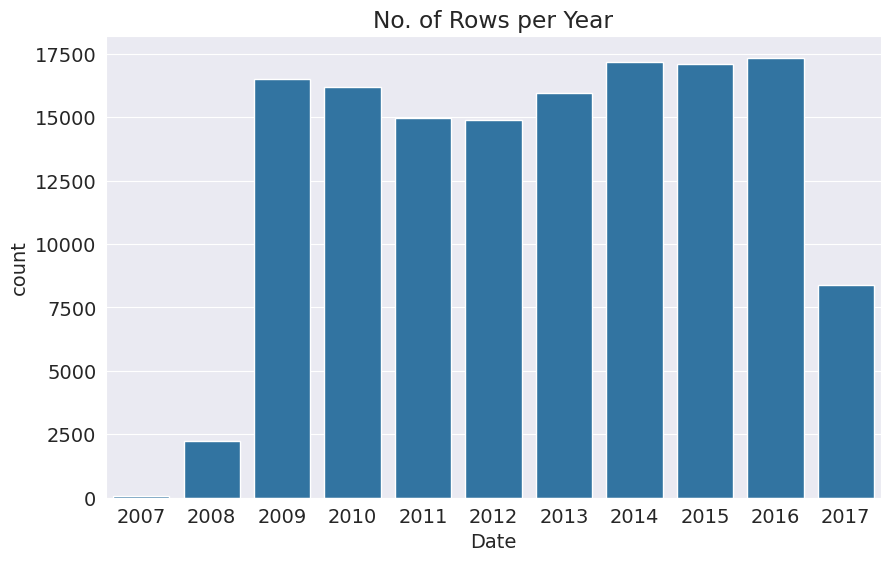

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date, dayfirst=True, format='mixed').dt.year);

In [ ]:
year=pd.to_datetime(raw_df.Date,dayfirst=True, format='mixed').dt.year
train_df = raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [ ]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:',val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (97988, 23)
val_df.shape: (17089, 23)
test_df.shape: (25710, 23)


While not a perfet 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01/12/2008   Albury     13.4     22.9       0.6          NaN   
1       02/12/2008   Albury      7.4     25.1       0.0          NaN   
2       03/12/2008   Albury     12.9     25.7       0.0          NaN   
3       04/12/2008   Albury      9.2     28.0       0.0          NaN   
4       05/12/2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  27/12/2014    Uluru     16.9     33.2       0.0          NaN   
144549  28/12/2014    Uluru     15.1     36.8       0.0          NaN   
144550  29/12/2014    Uluru     17.3     37.8       0.0          NaN   
144551  30/12/2014    Uluru     20.1     38.5       0.0          NaN   
144552  31/12/2014    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    01/01/2015   Albury     11.4     33.5       0.0          NaN   
2134    02/01/2015   Albury     15.5     39.6       0.0          NaN   
2135    03/01/2015   Albury     17.1     38.3       0.0          NaN   
2136    04/01/2015   Albury     26.0     33.1       0.0          NaN   
2137    05/01/2015   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  27/12/2015    Uluru     20.5     34.7       0.0          NaN   
144914  28/12/2015    Uluru     18.0     36.4       0.0          NaN   
144915  29/12/2015    Uluru     17.5     37.1       0.0          NaN   
144916  30/12/2015    Uluru     20.0     38.9       0.0          NaN   
144917  31/12/2015    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    01/01/2016   Albury     20.4     37.6       0.0          NaN   
2499    02/01/2016   Albury     20.9     33.6       0.4          NaN   
2500    03/01/2016   Albury     18.4     23.1       2.2          NaN   
2501    04/01/2016   Albury     17.3     23.7      15.6          NaN   
2502    05/01/2016   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  20/06/2017    Uluru      3.5     21.8       0.0          NaN   
145455  21/06/2017    Uluru      2.8     23.4       0.0          NaN   
145456  22/06/2017    Uluru      3.6     25.3       0.0          NaN   
145457  23/06/2017    Uluru      5.4     26.9       0.0          NaN   
145458  24/06/2017    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

##**Identifying Inputs and columns**

Not all columns in a dataset are useful for training a model. We ignore the Date column, since we only want to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [ ]:
input_cols=list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
target_col

'RainTomorrow'

We can now create inputss and targets for the training, validation and test sets for further processing and model training.

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01/12/2008   Albury     13.4     22.9       0.6          NaN   
1       02/12/2008   Albury      7.4     25.1       0.0          NaN   
2       03/12/2008   Albury     12.9     25.7       0.0          NaN   
3       04/12/2008   Albury      9.2     28.0       0.0          NaN   
4       05/12/2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  20/06/2017    Uluru      3.5     21.8       0.0          NaN   
145455  21/06/2017    Uluru      2.8     23.4       0.0          NaN   
145456  22/06/2017    Uluru      3.6     25.3       0.0          NaN   
145457  23/06/2017    Uluru      5.4     26.9       0.0          NaN   
145458  24/06/2017    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

Some columns are derived from targets columns and should not be included as part of input columns.

In [ ]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [ ]:
val_inputs= val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [ ]:
test_inputs =test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [ ]:
train_targets##Series or dataframes

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Let's identify which of the columns are numerical and which ones are categorical.

In [ ]:
##!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()



Let's view some statistics for the numeric columns.

In [ ]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am']

In [ ]:
train_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000  
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126  
std        7.072510      6.997072      2.866634      2.693370      6.404586  
min      980.500000    979.000000      0.000000      0.000000     -5.900000  
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000  
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000  
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000  
max     1041.000000   1039.600000      9.000000      9.000000     40.200000

Do the ranges of the numeric columns seem resonable? if not , we have to do some data cleaning as well.

Let's check the number of categories in each of the categorical columns.

In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## **Imputing Missing Numeric Data**

Machine learning models can't work with missing numerical data. The process of filing missing values is called **imputation**.

We replace missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`. You can use the mean, fixed value or even the median if there are outliers that might affect the average .i.e the income column.
> *Using the median for imputation can help mitigate the influence of outliers and provide a more robust estimate for missing values, especially in cases where the data distribution is skewed or contains extreme values*

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy = 'mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.


In [ ]:
raw_df[numerical_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for `train_inputs`, `val_inputs` and `test_inputs`.

In [ ]:
train_inputs[numerical_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
dtype: int64

The first step is to `fit` the imputer to the data .i.e compute the chosen statistics (e.g mean) for each column in gthe dataset.

In [ ]:
imputer.fit(raw_df[numerical_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_property` of the `imputer`.

In [ ]:
print(numerical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am']


In [ ]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

The missing values in the training, test and validation sets can now be filled using the `transform` method of `imputer`.

In [ ]:
# Overwrite the previous values with new imputed values
train_inputs[numerical_cols]= imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=imputer.transform(test_inputs[numerical_cols])

The missing values have now been replaced with the imputed values.

In [ ]:
train_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

**EXERCISE:** Apply some other imputation techniques and observe how they change the rsults of the model.

##**Scaling Numeric features**

The features are scaed to a small range of values e.g. (0,1) or (-1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [ ]:
raw_df[numerical_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am  
count  84693.000000  140131.000000  
mean       4.499250      16.987066  
std        2.719752       6.496012  
min        0.000000      -7.200000  
25%        2.000000      12.300000  
50%        5.000000      16.700000  
75%        7.000000      21.600000  
max        9.000000      40.200000

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the (0,1) range which is suitable for classification problems. You can also scale values to the (-1, 1) range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
?MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numerical_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [ ]:
print('Minimum:')
print(scaler.data_min_)


Minimum:
[ -8.5  -4.8   0.    0.    0.    6.    0.    0.    0.    0.  980.5 977.1
   0.    0.   -7.2]


In [ ]:
print('Maximum')
list(scaler.data_max_)

Maximum


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [ ]:
train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])

In [ ]:
train_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000  
mean       0.612014      0.608705      0.483192      0.493693      0.507089  
std        0.111335      0.106611      0.255486      0.238028      0.134722  
min        0.000000      0.030400      0.000000      0.000000      0.027426  
25%        0.543802      0.540800      0.333333      0.333333      0.409283  
50%        0.614125      0.610527      0.492351      0.499917      0.502110  
75%        0.682645      0.675200      0.666667      0.666667      0.601266  
max        1.000000      1.000000      1.000000      1.000000      1.000000

## **Encoding Categorical values**

Since Machine learning models can only be trained with numeric data, we need to convert categorical data numbers. One-hot encoding for categorical columns is used.

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [ ]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform `one hot encoding` using the `OneHotEncoder` class from `sklearn.preprocessing`

In [ ]:
raw_df.Location.unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
?OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False, handle_unknown = 'ignore')

First, we `fit` the encoder to the data .i.e identify the full list of categories across all categorical columns.

In [ ]:
encoder.fit(raw_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
raw_df2=raw_df[categorical_cols].fillna('unknown')

In [ ]:
encoder.fit(raw_df2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
raw_df[categorical_cols]

Location WindGustDir WindDir9am WindDir3pm RainToday
0        Albury           W          W        WNW        No
1        Albury         WNW        NNW        WSW        No
2        Albury         WSW          W        WSW        No
3        Albury          NE         SE          E        No
4        Albury           W        ENE         NW        No
...         ...         ...        ...        ...       ...
145454    Uluru           E        ESE          E        No
145455    Uluru           E         SE        ENE        No
145456    Uluru         NNW         SE          N        No
145457    Uluru           N         SE        WNW        No
145458    Uluru          SE        SSE          N        No

[140787 rows x 5 columns]

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
encoder.categories_


[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'unknown'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'unknown'], dtype=

The encoder has created a list of categories for each of the categorical columns in the dataset.
We can generate column names for each individual categories using `get_feature_names`.

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

NameError: name 'encoded_cols' is not defined